<a href="https://colab.research.google.com/github/Elizabeth37/Data-Science/blob/master/COVID_19_Kaggle_Textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 - Kaggle Textos

- Link para o desafio: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge
- Call to action: https://www.whitehouse.gov/briefings-statements/call-action-tech-community-new-machine-readable-covid-19-dataset/

## Instalação e importação das bibliotecas

In [0]:
import numpy as np
import zipfile
import pandas as pd
import glob
import json
import seaborn as sns
import spacy
import nltk
from IPython.core.display import HTML
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!pip install scispacy

In [0]:
import scispacy

In [0]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz

     |████████████████████████████████| 70.0MB 43kB/s 
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.2.4-cp36-none-any.whl size=70498247 sha256=63d881893ca57fb0ef8b09f88023d72f84b8ffa87f9c87f6b23b53a488c0d559
  Stored in directory: /root/.cache/pip/wheels/12/b3/89/7fbb30f56411e8b4002eac6d5568ab46da63191a2287aa17bf
Successfully built en-core-sci-md


In [0]:
import en_core_sci_md

In [0]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


## Carregamento dos arquivos

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/CORD-19-research-challenge.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Criação do dataframe com os textos

In [0]:
corona_features = {'paper_id': [], 'title': [],
                   'abstract': [], 'text': []}

In [0]:
type(corona_features)

dict

In [0]:
corona_df = pd.DataFrame.from_dict(corona_features)

In [0]:
type(corona_df)

pandas.core.frame.DataFrame

In [0]:
corona_df.head()

Empty DataFrame
Columns: [paper_id, title, abstract, text]
Index: []

In [0]:
json_filenames = glob.glob(f'{"./"}//**/*.json', recursive = True)

In [0]:
print(json_filenames)

['./biorxiv_medrxiv/biorxiv_medrxiv/537009c0181c3269f40753f75ddca4d17ae8abae.json', './biorxiv_medrxiv/biorxiv_medrxiv/e08d308e5923cb4f741d34a6cd3548a17a04a2b1.json', './biorxiv_medrxiv/biorxiv_medrxiv/f2f114ba9f0b618a8b2396ab87f2d861ba9fd483.json', './biorxiv_medrxiv/biorxiv_medrxiv/ab1692d56f32fdb0922e5f323f6ca385fb1e0808.json', './biorxiv_medrxiv/biorxiv_medrxiv/23f1bab7d94bd0564e2319fddf75c1c7987ce75f.json', './biorxiv_medrxiv/biorxiv_medrxiv/9896bc65559e6406d0d3cb35e9b01b953d61959d.json', './biorxiv_medrxiv/biorxiv_medrxiv/ac4a3bbe27272cd6780e7168906b0bf1413fc749.json', './biorxiv_medrxiv/biorxiv_medrxiv/671b44ae9bec89cacf7ae9e7b2a79649a9b66773.json', './biorxiv_medrxiv/biorxiv_medrxiv/38e796bbec2f90b1b802c14dc922102e96f6361e.json', './biorxiv_medrxiv/biorxiv_medrxiv/5a5a7b6d40c4b752aabf69f69bbd7c71e2658e8e.json', './biorxiv_medrxiv/biorxiv_medrxiv/1c06378f629bfa8870c89b3abfdecfc19db9b459.json', './biorxiv_medrxiv/biorxiv_medrxiv/7607a4ad84452e29998a80f44bfd6bb2f5f68a7f.json', './

In [0]:
len(json_filenames)

29316

In [0]:
def return_corona_df(json_filenames, df):
  for file_name in json_filenames:
    row = {'paper_id': None, 'title': None,
           'abstract': None, 'text': None}
    
    with open(file_name) as json_data:
      if file_name == './sample_data/anscombe.json':
        continue

      data = json.load(json_data)

      row['paper_id'] = data['paper_id'].strip() # ' 345 ' -> '345'
      row['title'] = data['metadata']['title'].strip()

      abstract_list = [abstract['text'] for abstract in data['abstract']]
      abstract = '\n '.join(abstract_list)
      row['abstract'] = abstract.strip()

      text_list = [text['text'] for text in data['body_text']]
      text = '\n '.join(text_list)
      row['text'] = text.strip()

      df = df.append(row, ignore_index = True)
  return df

In [0]:
corona_df = return_corona_df(json_filenames, corona_df)

In [0]:
corona_df.shape

(29315, 4)

In [0]:
corona_df.head()

paper_id  ...                                               text
0  537009c0181c3269f40753f75ddca4d17ae8abae  ...  In December 2019, an epidemic caused by the ne...
1  e08d308e5923cb4f741d34a6cd3548a17a04a2b1  ...  In December 2019, an outbreak of the 2019 coro...
2  f2f114ba9f0b618a8b2396ab87f2d861ba9fd483  ...  The outbreak of a novel coronavirus (SARS-CoV-...
3  ab1692d56f32fdb0922e5f323f6ca385fb1e0808  ...  Host range is defined as the number and nature...
4  23f1bab7d94bd0564e2319fddf75c1c7987ce75f  ...  In generic, the population, for an SIS model, ...

[5 rows x 4 columns]

In [0]:
corona_df['text'][0]

'In December 2019, an epidemic caused by the new coronavirus COVID-19 occurred in Wuhan, China. The number of infected people and the spread of the virus have continued to increase, putting pressure not only on China but also the public health security worldwide (1) . The rapid research on COVID-19 virology, epidemiology, and clinical medicine has played a positive role in the prevention and treatment of the disease (2) (3) (4) (5) (6) (7) (8) (9) (10) (11) . Considering the similarity of coronaviruses, the public habitually compares COVID-19 with SARS, especially regarding the data on cure rate (p) (CR) or case fatality rate (q) (CFR). In 2003, SARS emerged. The cumulative number of SARS diagnoses in Mainland China was 5,327, and the cumulative death toll was 349, with a CFR of 6.5 %; meanwhile, its cumulative number globally was 8,096, and the cumulative death toll was 744, with a CFR of 9.6 % (12).\n However, "there is currently no clear formula for the CR of patients with new pneum

In [0]:
len(corona_df['text'][0])

12518

# Pré-processamento



## Valores faltantes

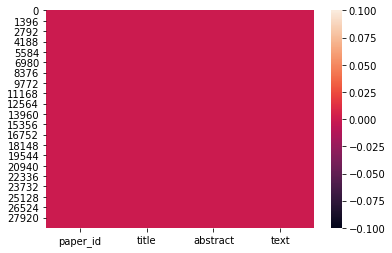

In [0]:
sns.heatmap(corona_df.isnull());

In [0]:
corona_df.shape

(29315, 4)

In [0]:
len(corona_df[corona_df['paper_id'] == ''])

0

In [0]:
len(corona_df[corona_df['title'] == ''])

3583

In [0]:
len(corona_df[corona_df['abstract'] == ''])

8051

In [0]:
len(corona_df[corona_df['text'] == ''])

0

In [0]:
corona_df = corona_df[corona_df['title'] != '']

In [0]:
corona_df = corona_df[corona_df['abstract'] != '']

In [0]:
corona_df.shape

(20343, 4)

## Valores duplicados

In [0]:
corona_df.drop_duplicates(['abstract', 'text', 'title'], inplace = True)

In [0]:
corona_df.shape

(20211, 4)

## Amostra da base de dados

In [0]:
corona_df = corona_df.sample(n = 500, random_state=1)

In [0]:
corona_df.shape

(500, 4)

In [0]:
corona_df.head()

paper_id  ...                                               text
7513  532f2c636fca1caae1f23885b9dc0e3302a0afd5  ...  DNA is well known as the molecule that stores ...
9109  04799a6c57e1d3f9488b24a4fc2580bbb3818665  ...  Rotavirus, a member of family Reoviridae, is o...
1026  d2057831023248265b009ed7fb7710123c69feaa  ...  Viroporins were first identified in 1978, afte...
7798  6eb0faeda9396efaf96674c33b40395012a01e0a  ...  Target detection in diagnostics and sensors re...
737   8d6d3be5f9353eb3358b44e646c83f1a90861b4d  ...  Viral pneumonia is a major cause of morbidity ...

[5 rows x 4 columns]

In [0]:
corona_df.tail()

paper_id  ...                                               text
22939  e404cb983d564e8297fe573cfb369c3ee41f0685  ...  Hepatitis B is a potentially life-threatening ...
164    3afd5fba7dc182ddfa769c0d766134b525581005  ...  hospital-associated infections in Wuhan 2, 6 ....
21028  bea1d1d130b407ba7382f561d3d193f6d9d646c7  ...  In June of 2012, the Middle East Respiratory S...
19472  09e70c44b20fc3618bdc374ebd82d72795941b2d  ...  imately 30% require admission to hospital. 2 T...
20877  5e2c1be088e0e4406e9446e7efc610a6a53d2315  ...  Feline calicivirus (FCV) is a small non-envelo...

[5 rows x 4 columns]

In [0]:
sample_text = corona_df['text'][7513]
sample_text

'DNA is well known as the molecule that stores genetic information. RNA, a close chemical cousin of DNA, acts as a molecular messenger to execute a set of genetic instructions (genes) encoded in the DNA, which come to life when genes are activated. First, the genetic information stored in DNA has to be copied, or transcribed, into RNA in the cell nucleus and then the information contained in RNA must be interpreted in the cytoplasm to build proteins through a process known as translation. Rather than being a simple process, the path from transcription to translation entails many steps of regulation that make crucial contributions to accurate gene control. This regulation is in large part orchestrated by proteins that bind to RNA and alter its localisation, structure, stability, and translational efficiency. The current paradigm of RNA-binding protein function is that they contain regions, or domains, that fold tightly into an ordered interaction platform that specifies how and where th

## Função para pré-processamento

In [0]:
nlp = en_core_sci_md.load(disable=['tagger', 'parser', 'ner'])
nlp.max_length = 2000000

In [0]:
print(spacy.lang.en.stop_words.STOP_WORDS)

{'first', 'put', 'give', 'really', 'still', '’m', 'among', 'throughout', 'under', 'get', 'what', 'your', 'then', 'unless', 'neither', 'along', 'onto', 'herein', 'otherwise', 'ten', 'into', 'has', 'which', "'ll", "'re", "'s", '‘re', 'even', 'toward', 'whenever', 'had', 'up', 'something', 'without', 'seem', 'therefore', 'others', 'whole', 'empty', 'same', 'became', 'yours', 'amount', 'anywhere', 'beside', 'before', 'most', 'never', 'whither', 'make', 'his', 'since', 'hereupon', 'are', 'can', 'me', 'thereafter', 'may', 'somehow', 'fifty', 'further', 'after', "'d", '‘ve', 'except', 'whom', 'ca', 'hereafter', 'must', 'did', 'nobody', 'keep', '‘d', 'seeming', 'please', 'very', 'not', 'but', 'about', 'call', 'hers', 'various', 'alone', 'out', 'am', 'nowhere', 'when', 'doing', 'he', '’s', 'seems', 'sixty', 'only', 'upon', 'was', 'many', 'whereafter', 'another', 'just', 'himself', 'forty', 'three', 'less', 'quite', 'have', 'every', 'might', 'anyone', 'thru', 'to', 'some', 'their', 'together', '

In [0]:
len(spacy.lang.en.stop_words.STOP_WORDS)

326

In [0]:
new_stop_words = ['et', 'al', 'doi', 'copyright', 'http', 'https', 'fig', 'table', 'result', 'show']
for word in new_stop_words:
  nlp.vocab[word].is_stop = True

In [0]:
def spacy_tokenizer(sentence):
  sentence = sentence.lower()
  list = []
  list = [word.lemma_ for word in nlp(sentence) if not (word.is_stop or
                                                        word.like_num or
                                                        word.is_punct or
                                                        word.is_space or
                                                        len(word) == 1)]
  list = ' '.join([str(element) for element in list])

  return list

In [0]:
sample_text

'DNA is well known as the molecule that stores genetic information. RNA, a close chemical cousin of DNA, acts as a molecular messenger to execute a set of genetic instructions (genes) encoded in the DNA, which come to life when genes are activated. First, the genetic information stored in DNA has to be copied, or transcribed, into RNA in the cell nucleus and then the information contained in RNA must be interpreted in the cytoplasm to build proteins through a process known as translation. Rather than being a simple process, the path from transcription to translation entails many steps of regulation that make crucial contributions to accurate gene control. This regulation is in large part orchestrated by proteins that bind to RNA and alter its localisation, structure, stability, and translational efficiency. The current paradigm of RNA-binding protein function is that they contain regions, or domains, that fold tightly into an ordered interaction platform that specifies how and where th

In [0]:
test = '1 ' + sample_text
test

'1 DNA is well known as the molecule that stores genetic information. RNA, a close chemical cousin of DNA, acts as a molecular messenger to execute a set of genetic instructions (genes) encoded in the DNA, which come to life when genes are activated. First, the genetic information stored in DNA has to be copied, or transcribed, into RNA in the cell nucleus and then the information contained in RNA must be interpreted in the cytoplasm to build proteins through a process known as translation. Rather than being a simple process, the path from transcription to translation entails many steps of regulation that make crucial contributions to accurate gene control. This regulation is in large part orchestrated by proteins that bind to RNA and alter its localisation, structure, stability, and translational efficiency. The current paradigm of RNA-binding protein function is that they contain regions, or domains, that fold tightly into an ordered interaction platform that specifies how and where 

In [0]:
result = spacy_tokenizer(test)
result

'dna know molecule store genetic information rna close chemical cousin dna act molecular messenger execute set genetic instruction gene encode dna come life gene activate genetic information store dna copy transcribe rna cell nucleus information contain rna interpret cytoplasm build protein process know translation simple process path transcription translation entail step regulation crucial contribution accurate gene control regulation large orchestrate protein bind rna alter localisation structure stability translational efficiency current paradigm rna-binding protein function contain region domain fold tightly order interaction platform specify interaction rna occur review describe paradigm challenge study show hitherto neglect region rna-binding protein spite intrinsically disorder play key functional role protein-rna interaction protein harbour disorder region involve virtually step rna regulation instance implicate disease base excite recent discovery indicate unexpectedly pervasi

In [0]:
corona_df['text'] = corona_df['text'].apply(spacy_tokenizer)

In [0]:
print(sample_text)

DNA is well known as the molecule that stores genetic information. RNA, a close chemical cousin of DNA, acts as a molecular messenger to execute a set of genetic instructions (genes) encoded in the DNA, which come to life when genes are activated. First, the genetic information stored in DNA has to be copied, or transcribed, into RNA in the cell nucleus and then the information contained in RNA must be interpreted in the cytoplasm to build proteins through a process known as translation. Rather than being a simple process, the path from transcription to translation entails many steps of regulation that make crucial contributions to accurate gene control. This regulation is in large part orchestrated by proteins that bind to RNA and alter its localisation, structure, stability, and translational efficiency. The current paradigm of RNA-binding protein function is that they contain regions, or domains, that fold tightly into an ordered interaction platform that specifies how and where the

In [0]:
len(sample_text)

35053

In [0]:
print(corona_df['text'][7513])

dna know molecule store genetic information rna close chemical cousin dna act molecular messenger execute set genetic instruction gene encode dna come life gene activate genetic information store dna copy transcribe rna cell nucleus information contain rna interpret cytoplasm build protein process know translation simple process path transcription translation entail step regulation crucial contribution accurate gene control regulation large orchestrate protein bind rna alter localisation structure stability translational efficiency current paradigm rna-binding protein function contain region domain fold tightly order interaction platform specify interaction rna occur review describe paradigm challenge study show hitherto neglect region rna-binding protein spite intrinsically disorder play key functional role protein-rna interaction protein harbour disorder region involve virtually step rna regulation instance implicate disease base excite recent discovery indicate unexpectedly pervasiv

In [0]:
len(corona_df['text'][7513])

23565

# Termos frequentes

In [0]:
for index, row in corona_df.iterrows():
  print(row['paper_id'], row['title'])
  text_file = open('corpus/' + row['paper_id'] + '.txt', 'w')
  n = text_file.write(row['text'])
  text_file.close()

532f2c636fca1caae1f23885b9dc0e3302a0afd5 The new (dis)order in RNA regulation
04799a6c57e1d3f9488b24a4fc2580bbb3818665 Development of porcine rotavirus vp6 protein based ELISA for differentiation of this virus and other viruses
d2057831023248265b009ed7fb7710123c69feaa Viroporins, Examples of the Two-Stage Membrane Protein Folding Model
6eb0faeda9396efaf96674c33b40395012a01e0a Single-Stranded DNA Aptamers against Pathogens and Toxins: Identification and Biosensing Applications
8d6d3be5f9353eb3358b44e646c83f1a90861b4d National Science and Technology Major Project (No. 2017ZX10204401); National Natural Science Foundation of China
627299eae35e71c737281db1c3d82596b1675db6 Social Influence in Liver Fluke Transmission: Application of Social Network Analysis of Food Sharing in Thai Isaan Culture
7c58d98057dc1e0a42c7aede5b3a5ac493a4d99e Comparison of loop-mediated isothermal amplification assay and smear microscopy with culture for the diagnostic accuracy of tuberculosis
68a7101a90454172c91785d

In [0]:
from nltk.corpus import PlaintextCorpusReader
corpus = PlaintextCorpusReader('corpus', '.*')

In [0]:
files = corpus.fileids()

In [0]:
files[0]

'00b88130d2a7c8489e209742494303b6731d7544.txt'

In [0]:
corpus.raw('00b88130d2a7c8489e209742494303b6731d7544.txt')

'baculovirus bv system production vaccine candidate induce humoral cell-mediated cross-immunity viral infection previously demonstrate wild-type wt bv autographa californica multiple nuclear polyhedrosis virus acmnpv bv-infected dendritic cell dcs exert natural killer nk cd8 cell-dependent antimetastatic effect mouse cd4 cell independent antimetastatic effect involve bv directly activate nk cell induce upregulation nk cell effector function tumor toll-like receptor (tlr9)dependent manner additionally bv show suppress live injury fibrosis vivo induction interferon ifn molinari al. report bv carry ovalbumin ovum vp39 capsid protein induce antitumor immunity hand study research group demonstrate high titer recombinant bv rbv antigen induce specific antibody high-level transgene expression rbv vector suit antitumor therapy test animal tumor model present study rbv-based combination vaccine develope express fragment frc tetanus toxin contain promiscuous mhc ii-binding sequence p30-ova pepti

In [0]:
words = corpus.words()
print(words)

['baculovirus', 'bv', 'system', 'production', ...]


In [0]:
len(words)

1464762

In [0]:
frequency = nltk.FreqDist(words)
most_common = frequency.most_common(100)
most_common

[('-', 61077),
 ('.', 20810),
 ('cell', 13743),
 ('/', 9416),
 ('virus', 8759),
 ('al', 7701),
 ('protein', 7371),
 ('study', 6752),
 ('infection', 6633),
 ('patient', 4819),
 ('show', 4599),
 ('disease', 4471),
 ('viral', 4408),
 ('high', 3964),
 ('datum', 3848),
 ('result', 3670),
 ('time', 3651),
 ('mouse', 3500),
 ('increase', 3489),
 ('1', 3480),
 ('fig', 3411),
 ('sample', 3381),
 ('rna', 3320),
 ('gene', 3316),
 ('sequence', 3313),
 ('control', 3274),
 ('human', 3252),
 ('test', 3201),
 ('response', 3130),
 ('include', 3107),
 ('group', 3092),
 ('model', 3067),
 ('antibody', 2924),
 ('level', 2868),
 ('expression', 2857),
 ('analysis', 2857),
 ('case', 2850),
 ('effect', 2722),
 ('report', 2706),
 ('day', 2621),
 ('system', 2543),
 ('specific', 2533),
 ('find', 2514),
 ('2', 2511),
 ('bind', 2496),
 ('figure', 2472),
 ('follow', 2467),
 ('different', 2465),
 ('low', 2434),
 ('de', 2426),
 ('infect', 2362),
 ('numb', 2262),
 ('strain', 2261),
 ('activity', 2256),
 ('compare', 223

# Nuvem de palavras

In [0]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [0]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words=100, colormap=color_map)

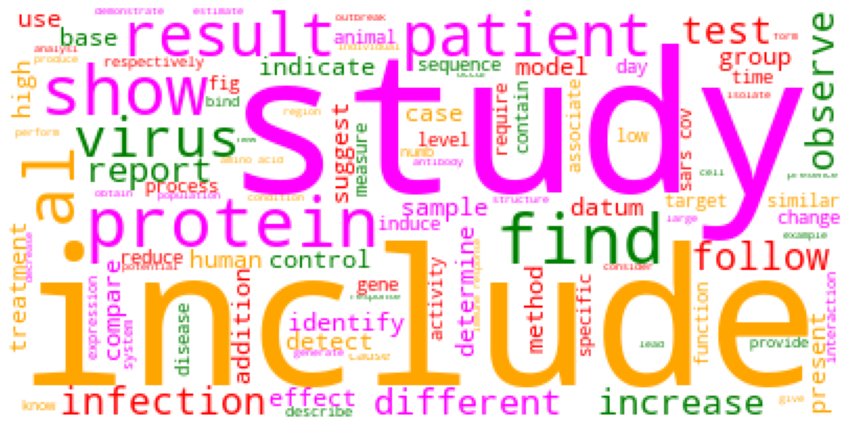

In [0]:
cloud = cloud.generate(corona_df['text'].str.cat(sep='\n'))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [0]:
corona_df.to_csv('corona_df.csv')

# Extração de entidades nomeadas

## Testes com a função

In [0]:
text = str(corona_df['text'][10644])
print(text)

know diarrhea young animal cause protozoon bacterium virus rotavirus coronavirus parvovirus parvovirus-like agent enteropathogenic strain e. coli salmonella species commonly involve etiology condition virus consider review mebus al. report have reproduce diarrhea colostrumdeprived calve filtrate fecal material infect calve give oral route show feces calve expose natural experimental infection contain viral particle resemble member reoviridae family late similar viral particle observe duodenal mucosa feces child diarrhea viral isolate calve child resemble cytoplasm pk-15 cell infect bovine swine ovine rotavirus mature virion numerous particle probably defective virus unable multiply permissive cell recently demonstrate pig rotavirus serially passaged pig kidney cell culture virus treat pancreatin trypsin prior inoculation culture capacity bovine rotavirus produce plaque appear greatly promote trypsin deae-dextran order facilitate replication wild strain virus cell culture recommend 1:10

In [0]:
nlp_ent = spacy.load('en')
nlp_ent.max_length = 2000000

In [0]:
doc = nlp_ent(text)

In [0]:
for entity in doc.ents:
  if entity.label_ == 'NORP' or entity.label_ == 'GPE':
    print(entity.text, entity.label_)

ovine NORP
trypsin NORP
scotland GPE
germany GPE
canada GPE
avian NORP
belgium GPE
canada GPE
kingdom strain GPE
maryland GPE
colorado south dakota GPE
oregon GPE
algeria GPE
japan GPE


In [0]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Contagem das entidades na base de dados

In [0]:
gpe = []
for index, row in corona_df.iterrows():
  text = row['text']
  doc = nlp_ent(text)
  for entity in doc.ents:
    if entity.label_ == 'GPE':
      gpe.append(str(entity.text))

In [0]:
print(gpe)

['scotland', 'germany', 'canada', 'belgium', 'canada', 'kingdom strain', 'maryland', 'colorado south dakota', 'oregon', 'algeria', 'japan', 'china', 'wuhan hubei province', 'china', 'china', 'china', 'japan', 'thailand', 'south korea', 'singapore', 'india', 'canada', 'germany', 'france', 'cd4', 'roraima', 'brazil', 'usa korea', 'brazil', 'brazil', 'cat county', 'brazil', 'brazil', 'population county', 'brazil', 'brazil', 'japan', 'tokyo', 'japan', 'japan', 'ecov', 'hai', 'japan', 'china', 'city hubei province', 'wuhan', 'china', 'hubei', 'hubei province', 'china hubei province', 'hubei province', 'hubei province', 'china', 'china', 'china', 'china', 'hong kong', 'tibet', 'qinghai', 'guangdong', 'beijing', 'guangdong', 'sichuan hebei zhejiang', 'tianjin', 'wuhan hubei', 'hubei province', 'province city', 'hubei', 'eritrea', 'south africa', 'canada', 'madang province', 'seoul', 'korea', 'mfds korea', 'seoul korea', '−70', 'http://vassarstats.net/', 'kappa', 'germany', 'asia africa', 'ind

In [0]:
values_gpe, counts_gpe = np.unique(np.array(gpe), return_counts = True)

In [0]:
gpe_df = pd.DataFrame({'value': values_gpe, 'counts': counts_gpe})

In [0]:
gpe_df.head()

value  counts
0       -α-tubulin 1:200       1
1                 /cd105       8
2                     /m      11
3     1(becton dickinson       1
4  1-(2-methylpropyl)-lh       1

In [0]:
gpe_df.shape

(1498, 2)

In [0]:
gpe_df_filtered = gpe_df[gpe_df.counts > 50]

In [0]:
gpe_df_filtered.shape

(16, 2)

In [0]:
gpe_df_filtered.head(16)

value  counts
36            adcp      60
158         brazil      59
214          china     555
393        germany      95
493      hong kong     125
562          india      53
595          japan     146
778           mast     176
889     neutrophil      54
953        optimal      64
1129  saudi arabia      51
1160     singapore      51
1175   south korea      63
1218        taiwan     164
1274        turkey     146
1336            uk      63

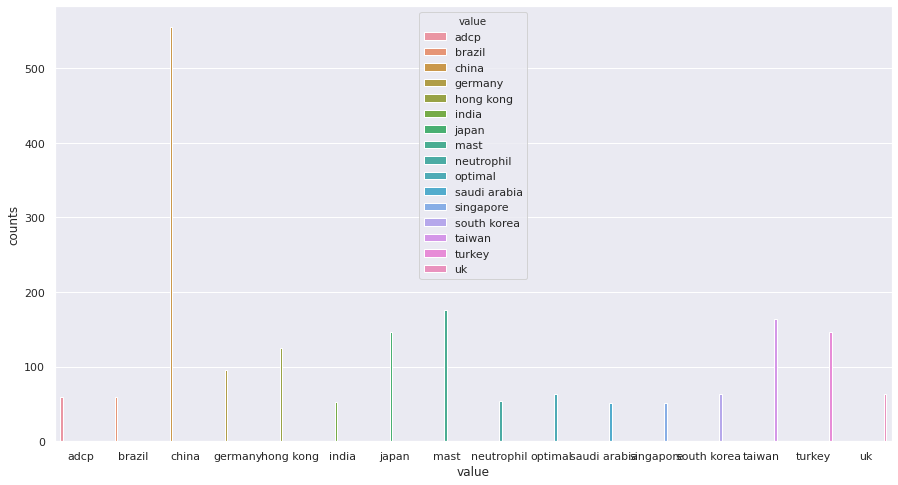

In [0]:
sns.set(rc={'figure.figsize': (15,8)})
sns.barplot(x = 'value', y = 'counts', hue='value', data=gpe_df_filtered);

# Textos utilizados para pesquisa

## What do we know about COVID-19 risk factors?

- Smoking, 
- pre-existing pulmonary disease
- Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other - co-morbidities
- Neonates and pregnant women
- Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences

## What do we know about non-pharmaceutical interventions?

- Guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases.
Rapid design and execution of experiments to examine and compare NPIs currently being implemented. DHS Centers for Excellence could potentially be leveraged to conduct these experiments.




# Pesquisa com uma palavra e NLTK

In [0]:
text = nltk.Text(corpus.words())

In [0]:
match = text.concordance('pulmonary', width = 150, lines=30)

Displaying 30 of 175 matches:
ion indicate acute respiratory distress syndrome ards leave lung show pulmonary edema hyaline membrane formation suggestive early - phase ards pathol
odulator treatment b16 - f10 murine lymphoma cell swainsonine inhibit pulmonary colonisation immunodeficient mouse growth sarcoma inhibit metastasis 
 ards define lung disease acute onset non - cardiac diffuse bilateral pulmonary infiltrate pao / fio ali pao / fio ards study exclude duplicate study
virulent phenotype infection virus display protein ic increase damage pulmonary epithelium edema accumulation lung airway fig . ultimate determinant 
al . virus display protein ion channel activity cause increase damage pulmonary epithelium correlate edema accumulation fig . addition sars - cov pro
c activity protein contribute lung edema observe sars - cov infection pulmonary epithelial damage associate deleterious exacerbate inflammatory respo
imada haritani kawamura narita imada haritani nasopharyngeal tracheal 

In [0]:
type(match)

NoneType

# Pesquisa com uma palavra e "find"

## Testando o método "find"

In [0]:
string = 'spread wuhan city china infect traveller cause sporadic secondary transmission city secondary city epidemic'
search_string = 'city'

In [0]:
print(string.find(search_string))

13


In [0]:
string[13]

'c'

In [0]:
string[13:13+10]

'city china'

In [0]:
string[13-10:13]

'ead wuhan '

In [0]:
string[13:13+10000]

'city china infect traveller cause sporadic secondary transmission city secondary city epidemic'

In [0]:
# Código baseado em: https://www.journaldev.com/23666/python-string-find
def find_texts(input_str, search_str, number_of_words):
  l = []
  index = 0
  number_of_words = number_of_words
  while index < len(input_str):
    i = input_str.find(search_str, index)
    if i == -1:
      return l
    
    if input_str[i-number_of_words:i] == '':
      start = 0
    else:
      start = i - number_of_words

    l.append(input_str[start:i] + input_str[i:i+number_of_words])
    index = i + 1
  return l

In [0]:
texts = find_texts(string, search_string, 50)
texts

['spread wuhan city china infect traveller cause sporadic seconda',
 't traveller cause sporadic secondary transmission city secondary city epidemic',
 'se sporadic secondary transmission city secondary city epidemic']

In [0]:
display(HTML(f'<h1>{search_string.upper()}</h1>'))
display(HTML(f"""<p><strong>Number of matches:</strong> {len(texts)}</p>"""))
for i in texts:
  #print(i)
  marked_text = str(i.replace(search_string, f"<mark>{search_string}</mark>"))
  #print(marked_text)
  display(HTML(f"""<blockquote>... {marked_text} ...</blockquote>"""))

## Aplicação na base de dados

In [0]:
search_string = 'pulmonary disease'

In [0]:
search_string = spacy_tokenizer(search_string)
search_string

'pulmonary disease'

In [0]:
def find_all_texts(input_str, search_str, number_of_words):
  text_list = []
  index = 0
  number_of_words = number_of_words
  while index < len(input_str):
    i = input_str.find(search_str, index)
    if i == -1:
      return text_list
    
    if input_str[i-number_of_words:i] == '':
      start = 0
    else:
      start = i - number_of_words

    text_list.append(input_str[start:i] + input_str[i:i+number_of_words])
    index = i + 1
  return text_list

In [0]:
documents = []
for index, row in corona_df.iterrows():
  documents.append(find_all_texts(row['text'], search_string, 40))

In [0]:
len(documents)

500

In [0]:
for doc in documents:
  if doc != []:
    print(doc)

['nt independent response microbe history smoke furthermore identify epitope fall ', 'ponse role chlamydia pneumonia antibody smoker acute ischemic stroke indian stud', 'udy bandaru vcs srinivasarao background smoke major risk factor cerebrovascular ', 'able association c. pneumonia infection smoker acute ischemic stroke objective i', ' investigate role c. pneumonia antibody smoker acute ischemic stroke methodology', 'patient acute ischemic stroke age group smoker nor-smoker were151 c. pneumonia s', 'te ischemic stroke age group smoker nor-smoker were151 c. pneumonia seropositivi', '. pneumonia seropositivity find 40(57.9 smoker non-smoker crp elevate smoker com', ' seropositivity find 40(57.9 smoker non-smoker crp elevate smoker compare non-sm', 'd 40(57.9 smoker non-smoker crp elevate smoker compare non-smoker smoker multipl', 'n-smoker crp elevate smoker compare non-smoker smoker multiple logistic regressi', 'r crp elevate smoker compare non-smoker smoker multiple logistic regressio

In [0]:
for index, row in corona_df.iterrows():
  texts = find_all_texts(row['text'], search_string, 400)
  if texts == []:
    continue
  
  paper_id = row['paper_id']
  title = row['title']
  display(HTML(f'<h1>{search_string.upper()}</h1>'))
  display(HTML(f"""<p>
                      <strong>Title:</strong> {title}</br>
                      <strong>ID:</strong> {paper_id}</br>
                      <strong>Number of matches:</strong> {len(texts)}
                   </p>"""))
  for i in texts:
    marked_text = str(i.replace(search_string, f"<mark>{search_string}</mark>"))
    display(HTML(f"""<blockquote>... {marked_text} ...</blockquote>"""))  


Vantagens
- Rápido
- Fácil implementação
- Muito útil para pesquisas simples com uma palavra
- Bom para palavras-chave

Desvantagens
- Somente uma palavra-chave
- Não possui ordenação de importância
- Considera somente a palavra "completa"

# Pesquisa com mais palavras e spaCy

## Testando o spaCy

In [0]:
string = 'spread wuhan city china infect traveller cause sporadic secondary transmission city secondary city epidemic'

In [0]:
search_strings = ['city', 'traveller']
tokens_list = [nlp(item) for item in search_strings]

In [0]:
tokens_list

[city, traveller]

In [0]:
print(nlp.vocab)

In [0]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, *tokens_list)

In [0]:
doc = nlp(string)
matches = matcher(doc)
matches

[(8661325627334373315, 2, 3),
 (8661325627334373315, 5, 6),
 (8661325627334373315, 10, 11),
 (8661325627334373315, 12, 13)]

In [0]:
doc[2:3]

city

In [0]:
doc[5:6]

traveller

In [0]:
doc[10:11]

city

In [0]:
doc[12:13]

city

In [0]:
doc[10-5:10+5]

traveller cause sporadic secondary transmission city secondary city epidemic

In [0]:
matches[0]

(8661325627334373315, 2, 3)

In [0]:
matches[0][1]

2

In [0]:
matches[0][2]

3

In [0]:
doc[matches[0][1]:matches[0][2]]

city

## Aplicação na base de dados

In [0]:
search_strings = ['smoking', 'pulmonary disease']
tokens_list = [nlp(spacy_tokenizer(item)) for item in search_strings]
tokens_list

[smoke, pulmonary disease]

In [0]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, *tokens_list)
number_of_words = 50

In [0]:
search_strings_html = ' '.join([str(element) for element in search_strings])
search_strings_html

'smoking pulmonary disease'

In [0]:
for index, row in corona_df.iterrows():
  marked_text = ''
  doc = nlp(row['text'])
  paper_id = row['paper_id']
  title = row['title']
  matches = matcher(doc)
  if matches == []:
    continue

  display(HTML(f'<h1>{search_strings_html.upper()}</h1>'))
  display(HTML(f"""<p>
                      <strong>Title:</strong> {title}</br>
                      <strong>ID:</strong> {paper_id}</br>
                      <strong>Number of matches:</strong> {len(matches)}
                   </p>"""))
  for i in matches:
    start = i[1] - number_of_words
    if start < 0:
      start = 0
    for j in range(len(tokens_list)):
      if doc[i[1]:i[2]].similarity(tokens_list[j]) == 1.0:
        search_text = str(tokens_list[j])
        marked_text += str(doc[start:i[2] + number_of_words]).replace(search_text, f"<mark>{search_text}</mark>")
        marked_text += "<br /><br />"
  display(HTML(f"""<blockquote>... {marked_text} ...</blockquote>"""))

Vantagens
- Fácil implementação
- Muito útil para pesquisas simples com mais palavras
- Bom para palavras-chave
- Usa uma biblioteca própria para processamento de linguagem natural

Desvantagens
- Não possui ordenação de importância

# Similaridade entre strings com fuzzywuzzy

- Distância Levenshtein: https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_Levenshtein

## Testes com o fuzzywuzzy

In [0]:
!pip install fuzzywuzzy

In [0]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144791 sha256=63dcf39113ed68176a947da7e710910c4aab393639bc392ef900109444e949b3
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


In [0]:
from fuzzywuzzy import fuzz

In [0]:
# Similaridade da string em ordem
fuzz.ratio('Apple Inc.', 'Apple')

67

In [0]:
# Similaridade da string parcial
fuzz.partial_ratio('Apple Inc.', 'Apple')

100

In [0]:
# Ignora a ordem das palavras
fuzz.token_sort_ratio('Lakers x Chigaco Bulls', 'Chigago Bulls x Lakers')

95

In [0]:
# Ignora palavras duplicadas
fuzz.token_set_ratio('Today we have a great game: Lakers x Chigago Bulls', 'Chicago Bulls x Lakers')

78

## Comparação com o texto completo

In [0]:
search_string = 'Guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases. Rapid design and execution of experiments to examine and compare NPIs currently being implemented. DHS Centers for Excellence could potentially be leveraged to conduct these experiments'

In [0]:
search_string = spacy_tokenizer(search_string)
print(search_string)

guidance way scale npis coordinate way e.g. establish fund infrastructure authority support real time authoritative qualify participant collaboration state gain consensus consistent guidance mobilize resource geographic area critical shortfall identify time enhance health care delivery system capacity respond increase case rapid design execution experiment examine compare npis currently implement dhs center excellence potentially leverage conduct experiment


In [0]:
ratio = []
partial_ratio = []
sort_ratio = []
set_ratio = []
for index, row in corona_df.iterrows():
  ratio.append(fuzz.ratio(row['text'], search_string))
  partial_ratio.append(fuzz.partial_ratio(row['text'], search_string))
  sort_ratio.append(fuzz.token_sort_ratio(row['text'], search_string))
  set_ratio.append(fuzz.token_set_ratio(row['text'], search_string))

In [0]:
len(ratio)

500

In [0]:
np.array(ratio).mean()

0.018

In [0]:
np.array(partial_ratio).mean()

3.384

In [0]:
np.array(sort_ratio).mean()

0.016

In [0]:
np.array(set_ratio).mean()

41.888

## Comparação com o abstract

In [0]:
corona_df.head()

paper_id  ...                                               text
7513  532f2c636fca1caae1f23885b9dc0e3302a0afd5  ...  dna know molecule store genetic information rn...
9109  04799a6c57e1d3f9488b24a4fc2580bbb3818665  ...  rotavirus member family reoviridae causative a...
1026  d2057831023248265b009ed7fb7710123c69feaa  ...  viroporins identify observation viral infectio...
7798  6eb0faeda9396efaf96674c33b40395012a01e0a  ...  target detection diagnostics sensor rely succe...
737   8d6d3be5f9353eb3358b44e646c83f1a90861b4d  ...  viral pneumonia major cause morbidity mortalit...

[5 rows x 4 columns]

In [0]:
corona_df['abstract'] = corona_df['abstract'].apply(spacy_tokenizer)

In [0]:
corona_df.head()

paper_id  ...                                               text
7513  532f2c636fca1caae1f23885b9dc0e3302a0afd5  ...  dna know molecule store genetic information rn...
9109  04799a6c57e1d3f9488b24a4fc2580bbb3818665  ...  rotavirus member family reoviridae causative a...
1026  d2057831023248265b009ed7fb7710123c69feaa  ...  viroporins identify observation viral infectio...
7798  6eb0faeda9396efaf96674c33b40395012a01e0a  ...  target detection diagnostics sensor rely succe...
737   8d6d3be5f9353eb3358b44e646c83f1a90861b4d  ...  viral pneumonia major cause morbidity mortalit...

[5 rows x 4 columns]

In [0]:
ratio = []
partial_ratio = []
sort_ratio = []
set_ratio = []
for index, row in corona_df.iterrows():
  ratio.append(fuzz.ratio(row['abstract'], search_string))
  partial_ratio.append(fuzz.partial_ratio(row['abstract'], search_string))
  sort_ratio.append(fuzz.token_sort_ratio(row['abstract'], search_string))
  set_ratio.append(fuzz.token_set_ratio(row['abstract'], search_string))

In [0]:
np.array(ratio).mean()

1.458

In [0]:
np.array(partial_ratio).mean()

10.892

In [0]:
np.array(sort_ratio).mean()

1.49

In [0]:
np.array(set_ratio).mean()

8.884

## Retorno dos artigos mais similares

In [0]:
scores = {}
for index, row in corona_df.iterrows():
  scores[row['paper_id']] = fuzz.token_set_ratio(row['text'], search_string)

In [0]:
print(scores)

{'532f2c636fca1caae1f23885b9dc0e3302a0afd5': 39, '04799a6c57e1d3f9488b24a4fc2580bbb3818665': 26, 'd2057831023248265b009ed7fb7710123c69feaa': 39, '6eb0faeda9396efaf96674c33b40395012a01e0a': 55, '8d6d3be5f9353eb3358b44e646c83f1a90861b4d': 50, '627299eae35e71c737281db1c3d82596b1675db6': 73, '7c58d98057dc1e0a42c7aede5b3a5ac493a4d99e': 46, '68a7101a90454172c91785d8c352f776a82df5d4': 84, 'a078c0592e0594b7743010c6249ad2ed2712dc12': 36, '2b4696bf4bc923a139e8508086f854ca52b690d0': 49, 'c97b37850bdad70d9b424f7f6521ec9f0063e087': 33, 'f82bb9d2d37888e87a1f8f42c7f898a809c3bc94': 46, '39063a51b2de47e1b2ef019d04eac54ca1c3f2d9': 49, 'ca8a8442c2d83d1f7e921124eb0c6cf9dd4dafa6': 55, '2911291549d946552ade6c1b75dfe5e71653d1e3': 44, 'e1c8f343e712b43a4cedc0a09731ceada6abc146': 47, 'd10f869bf385bac400eca04356901f0647318818': 9, '5ef424a39823c1e6a0fc472b7ed744121356f11d': 58, '2a6d03c2466a88098a79eb95b0bccd23d91168ff': 32, '47654cf27ea49e075f800ff503bbeecb4168e224': 59, '7eb68a38a675a7317fdf4ca2c2030d96f322686

In [0]:
scores['532f2c636fca1caae1f23885b9dc0e3302a0afd5']

39

In [0]:
import operator
sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse = True)

In [0]:
sorted_scores[0:10]

[('68a7101a90454172c91785d8c352f776a82df5d4', 84),
 ('d0ae914bc90468ae1183c3affcafd91a563c6d8d', 81),
 ('127c02c0bf5753a11f9acb552b34ce383aa03ebb', 79),
 ('2e87670d524b1b76e2af6090d5cba472a6448f85', 78),
 ('22e2b707c4c937149359909ecca2b28727a36210', 77),
 ('f325810854281eff9580726b731db68df092a5bc', 76),
 ('715ec0aac4ad78092007345159945afa560b3f05', 74),
 ('50f42123b5035f840369d0ff88cc55263a1394b7', 74),
 ('ccf97f5ec6fd3e77311a55b40c34498e9ea649b8', 74),
 ('627299eae35e71c737281db1c3d82596b1675db6', 73)]

In [0]:
corona_df.loc[corona_df['paper_id'] == '68a7101a90454172c91785d8c352f776a82df5d4']

paper_id  ...                                               text
27555  68a7101a90454172c91785d8c352f776a82df5d4  ...  scar-free regeneration tissue organ occur fish...

[1 rows x 4 columns]

In [0]:
pd.set_option('display.max_colwidth', -1)
display(HTML(f'<h4>{search_string.upper()}</h4>'))
for i in sorted_scores[:10]:
  df = corona_df.loc[corona_df['paper_id'] == i[0]]
  display(HTML(f"""<p>
                      <strong>Title:</strong> {df['title']}</br>
                      <strong>ID:</strong> {i[0]}</br>
                      <strong>Score:</strong> {i[1]}</br>
                      <strong>Abstract:</strong> {str(df['abstract'])[0:700]}
                   </p>"""))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


Vantagens
- Biblioteca com várias funções
- Útil tanto para pesquisas por palavras-chave quanto para textos maiores
- Notas de acordo com a importância

Desvantagens
- Modelo de cálculo matemático não é muito adequado

# Documentos similares com TF-IDF e similaridade do cosseno

### TF-IDF (Term frequency - inverse document frequency)

- Redimensionar a frequência das palavras pela frequência com que aparecem em todos os documentos
- **Term frequency (TF)**: frequência da palavra no documento atual - TF = (número de vezes que o termo **t** aparece no documento) / (número de termos no documento)
- **Inverse document frequency (IDF)**: quão rara é a palavra nos documentos - IDF = log(N/n), **N** é o número de documentos e **n** é o número de documentos que o termo **t** apareceu
- **TF-IDF**: importância de uma palavra para um documento em uma coleção ou corpus

- Considerando um documento com 100 palavras no qual a palavra cachorro aparece 5 vezes
- TF = 5 / 100 = 0.05
- Temos 100 documentos no total (N) e a palavra cachorro aparece aparece em 20 desses documentos (n)
- IDF = log(100 / 20) = 0.69
- TF-IDF = 0.05 * 0.69 = 0.034

- Quanto maior o valor do peso, mais raro é o termo. Quanto menor o peso, mais comum é o termo

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
texts = corona_df['text'][:3].tolist()
texts

['dna know molecule store genetic information rna close chemical cousin dna act molecular messenger execute set genetic instruction gene encode dna come life gene activate genetic information store dna copy transcribe rna cell nucleus information contain rna interpret cytoplasm build protein process know translation simple process path transcription translation entail step regulation crucial contribution accurate gene control regulation large orchestrate protein bind rna alter localisation structure stability translational efficiency current paradigm rna-binding protein function contain region domain fold tightly order interaction platform specify interaction rna occur review describe paradigm challenge study show hitherto neglect region rna-binding protein spite intrinsically disorder play key functional role protein-rna interaction protein harbour disorder region involve virtually step rna regulation instance implicate disease base excite recent discovery indicate unexpectedly pervas

In [0]:
texts.append(texts[0])
texts

['dna know molecule store genetic information rna close chemical cousin dna act molecular messenger execute set genetic instruction gene encode dna come life gene activate genetic information store dna copy transcribe rna cell nucleus information contain rna interpret cytoplasm build protein process know translation simple process path transcription translation entail step regulation crucial contribution accurate gene control regulation large orchestrate protein bind rna alter localisation structure stability translational efficiency current paradigm rna-binding protein function contain region domain fold tightly order interaction platform specify interaction rna occur review describe paradigm challenge study show hitherto neglect region rna-binding protein spite intrinsically disorder play key functional role protein-rna interaction protein harbour disorder region involve virtually step rna regulation instance implicate disease base excite recent discovery indicate unexpectedly pervas

In [0]:
tfidf = TfidfVectorizer()
vectorized = tfidf.fit_transform(texts)

In [0]:
type(vectorized)

scipy.sparse.csr.csr_matrix

In [0]:
print(tfidf.get_feature_names())

['000', '01', '05', '100', '200', '24', '2b', '2c', '3a', '4f', '4s', '5000', '59', '5kcal', '6k', '6kcal', 'abate', 'aberrant', 'ability', 'ablation', 'able', 'above', 'absence', 'abundance', 'abundant', 'accessibility', 'accessible', 'accession', 'accommodate', 'accomplish', 'accord', 'account', 'accumulate', 'accurate', 'acetylation', 'achievable', 'achieve', 'acid', 'acidic', 'acidification', 'acidity', 'act', 'action', 'activate', 'activating', 'activation', 'activator', 'active', 'activity', 'acute', 'adapter', 'add', 'addition', 'additional', 'adjacent', 'adjuvant', 'adopt', 'advantage', 'affect', 'affinity', 'age', 'agent', 'aggregate', 'aggregation', 'agreement', 'aka', 'al', 'ala', 'albeit', 'algorithm', 'alignment', 'alike', 'allocate', 'allow', 'alpha', 'alphahelical', 'alter', 'alternate', 'alternative', 'alternatively', 'aly', 'amantadine', 'amino', 'amount', 'amphipatic', 'amphiphilic', 'amplification', 'amplify', 'analogous', 'analysis', 'analyze', 'anchor', 'and', 'and

In [0]:
len(tfidf.get_feature_names())

1782

In [0]:
print(tfidf.vocabulary_)

{'dna': 482, 'know': 894, 'molecule': 1020, 'store': 1567, 'genetic': 692, 'information': 830, 'rna': 1425, 'close': 273, 'chemical': 253, 'cousin': 368, 'act': 41, 'molecular': 1019, 'messenger': 989, 'execute': 579, 'set': 1486, 'instruction': 839, 'gene': 687, 'encode': 530, 'come': 284, 'life': 915, 'activate': 43, 'copy': 358, 'transcribe': 1654, 'cell': 238, 'nucleus': 1087, 'contain': 338, 'interpret': 855, 'cytoplasm': 387, 'build': 211, 'protein': 1291, 'process': 1268, 'translation': 1667, 'simple': 1510, 'path': 1161, 'transcription': 1655, 'entail': 545, 'step': 1564, 'regulation': 1365, 'crucial': 374, 'contribution': 347, 'accurate': 33, 'control': 349, 'large': 900, 'orchestrate': 1112, 'bind': 180, 'alter': 76, 'localisation': 933, 'structure': 1577, 'stability': 1554, 'translational': 1668, 'efficiency': 507, 'current': 380, 'paradigm': 1150, 'binding': 181, 'function': 669, 'region': 1363, 'domain': 489, 'fold': 647, 'tightly': 1643, 'order': 1113, 'interaction': 846,

In [0]:
print(tfidf.idf_)

[1.91629073 1.91629073 1.91629073 ... 1.91629073 1.91629073 1.91629073]


In [0]:
vectorized

<4x1782 sparse matrix of type '<class 'numpy.float64'>'
	with 3158 stored elements in Compressed Sparse Row format>

In [0]:
vectorized.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01040678, 0.02081356, 0.01040678, ..., 0.        , 0.04162711,
         0.08325423],
        [0.        , 0.        , 0.        , ..., 0.03772633, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [0]:
vectorized.todense().shape

(4, 1782)

## Similaridade do cosseno

- Link: https://en.wikipedia.org/wiki/Cosine_similarity
- Cálculos passo a passo: https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/
- Temos duas matrizes: TF e IDF
- Cosine Similarity (d1, d2) =  Dot product(d1, d2) / ||d1|| * ||d2||

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
vectorized[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [0]:
cosine_similarity(vectorized[0], vectorized[1])

array([[0.10296716]])

In [0]:
cosine_similarity(vectorized[0], vectorized[3])

array([[1.]])

In [0]:
similarity = cosine_similarity(vectorized[0], vectorized)
similarity

array([[1.        , 0.10296716, 0.17296681, 1.        ]])

## TF-IDF e similaridade do coseno na base de dados

In [0]:
texts = corona_df['text'].tolist()

In [0]:
texts[:10]

['dna know molecule store genetic information rna close chemical cousin dna act molecular messenger execute set genetic instruction gene encode dna come life gene activate genetic information store dna copy transcribe rna cell nucleus information contain rna interpret cytoplasm build protein process know translation simple process path transcription translation entail step regulation crucial contribution accurate gene control regulation large orchestrate protein bind rna alter localisation structure stability translational efficiency current paradigm rna-binding protein function contain region domain fold tightly order interaction platform specify interaction rna occur review describe paradigm challenge study show hitherto neglect region rna-binding protein spite intrinsically disorder play key functional role protein-rna interaction protein harbour disorder region involve virtually step rna regulation instance implicate disease base excite recent discovery indicate unexpectedly pervas

In [0]:
len(texts)

500

In [0]:
tfidf = TfidfVectorizer()
vectorized = tfidf.fit_transform(texts)

In [0]:
vectorized

<500x56676 sparse matrix of type '<class 'numpy.float64'>'
	with 395795 stored elements in Compressed Sparse Row format>

In [0]:
search_string = 'Guidance on ways to scale up NPIs in a more coordinated way (e.g., establish funding, infrastructure and authorities to support real time, authoritative (qualified participants) collaboration with all states to gain consensus on consistent guidance and to mobilize resources to geographic areas where critical shortfalls are identified) to give us time to enhance our health care delivery system capacity to respond to an increase in cases. Rapid design and execution of experiments to examine and compare NPIs currently being implemented. DHS Centers for Excellence could potentially be leveraged to conduct these experiments'

In [0]:
search_string = spacy_tokenizer(search_string)
print(search_string)

guidance way scale npis coordinate way e.g. establish fund infrastructure authority support real time authoritative qualify participant collaboration state gain consensus consistent guidance mobilize resource geographic area critical shortfall identify time enhance health care delivery system capacity respond increase case rapid design execution experiment examine compare npis currently implement dhs center excellence potentially leverage conduct experiment


In [0]:
search_string_vectorized = tfidf.transform([search_string])

In [0]:
search_string_vectorized

<1x56676 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [0]:
similarity = cosine_similarity(search_string_vectorized, vectorized)
similarity

array([[7.50219799e-03, 4.77153204e-03, 6.64844710e-03, 9.94223947e-03,
        2.14669076e-02, 2.17827350e-02, 1.42586441e-02, 2.93479036e-02,
        4.48383682e-03, 1.31047251e-02, 1.91410738e-02, 6.27114458e-03,
        1.44074147e-02, 2.29157455e-02, 3.48406209e-02, 1.12176690e-02,
        3.17494762e-03, 3.43578200e-02, 1.15180236e-02, 1.78373399e-02,
        7.90273523e-03, 1.89899967e-02, 7.36841520e-03, 5.84761269e-03,
        8.33207617e-03, 2.33429096e-02, 2.75848496e-02, 3.12590601e-02,
        1.10278988e-02, 1.91888839e-02, 1.35760394e-01, 1.04159353e-02,
        1.11009045e-02, 1.42032422e-02, 1.05087221e-02, 1.33568845e-02,
        7.67318420e-03, 3.76412262e-02, 5.64455152e-03, 1.09315037e-02,
        2.12832689e-02, 1.60792669e-02, 1.60590174e-02, 9.61027753e-03,
        4.10816718e-03, 1.93242887e-02, 2.48559557e-02, 8.70247239e-03,
        8.42828796e-03, 7.38834595e-03, 9.76019925e-03, 1.42445436e-02,
        1.36537616e-02, 2.20402785e-02, 1.77577744e-02, 0.000000

In [0]:
len(similarity[0])

500

In [0]:
scores_dict = {}
for i in range(len(similarity[0])):
  scores_dict[i] = similarity[0][i]

In [0]:
print(scores_dict)

{0: 0.007502197994315223, 1: 0.004771532042256482, 2: 0.006648447100992263, 3: 0.009942239469071745, 4: 0.021466907624836627, 5: 0.021782735041929922, 6: 0.014258644126661384, 7: 0.029347903606814267, 8: 0.0044838368239080925, 9: 0.013104725148083841, 10: 0.01914107375919584, 11: 0.006271144580763329, 12: 0.01440741471465128, 13: 0.02291574552670587, 14: 0.03484062085465028, 15: 0.011217669005897518, 16: 0.0031749476235183654, 17: 0.034357820023657976, 18: 0.011518023631231602, 19: 0.01783733989228543, 20: 0.007902735234001505, 21: 0.018989996716128367, 22: 0.007368415203549358, 23: 0.005847612686931705, 24: 0.008332076170425919, 25: 0.02334290963083455, 26: 0.02758484964486872, 27: 0.0312590600506118, 28: 0.011027898815398183, 29: 0.0191888839216429, 30: 0.13576039410064836, 31: 0.010415935296933302, 32: 0.011100904454991298, 33: 0.014203242189422217, 34: 0.01050872207843146, 35: 0.013356884548732989, 36: 0.007673184204103856, 37: 0.03764122620197519, 38: 0.005644551519875379, 39: 0.0

In [0]:
import operator
sorted_scores = sorted(scores_dict.items(), key=operator.itemgetter(1), reverse=True)

In [0]:
print(sorted_scores)

[(30, 0.13576039410064836), (268, 0.11432491768151054), (223, 0.11302545250205018), (374, 0.11088980585845797), (358, 0.07855054634164316), (266, 0.07494745814506101), (388, 0.07126385606937605), (177, 0.06977471856633599), (61, 0.06911769902837842), (305, 0.0657254744813155), (258, 0.06320738976116687), (489, 0.062319591289759), (107, 0.061425926316279494), (321, 0.06045834612148536), (426, 0.058301606934109684), (254, 0.05441882344340706), (118, 0.05425907987552847), (71, 0.05341238967669338), (317, 0.05196422014710944), (486, 0.05186570435051823), (269, 0.0476417996570114), (187, 0.046351478907085075), (165, 0.04478980242957258), (193, 0.042922965080724934), (188, 0.04286534023335), (222, 0.04184717220304771), (264, 0.039306592700978644), (436, 0.03833787645746766), (346, 0.038167176305287806), (434, 0.03800212393986386), (37, 0.03764122620197519), (255, 0.03753688988710988), (468, 0.03718245319391739), (292, 0.03651077577953577), (427, 0.036493003051526945), (162, 0.036424367065529

In [0]:
display(HTML(f'<h4>{search_string.upper()}</h4>'))
for i in sorted_scores[:10]:
  df = corona_df.iloc[i[0]]

  display(HTML(f"""<p>
                      <strong>Title:</strong> {df['title']}</br>
                      <strong>ID:</strong> {df['paper_id']}</br>
                      <strong>Score:</strong> {i[1]}</br>
                      <strong>Abstract:</strong> {str(df['abstract'][0:700])}
                   </p></br>"""))

# Agrupamento dos artigos

## Tratamento da base de dados

In [0]:
corona_df_completo = pd.read_csv('/content/gdrive/My Drive/corona_df_completo.csv')

In [0]:
corona_df_completo.shape

(20211, 5)

In [0]:
corona_df_completo = corona_df_completo.dropna()

In [0]:
corona_df_completo.shape

(20209, 5)

In [0]:
pd.set_option('display.max_colwidth', 100)
corona_df_completo.head()

Unnamed: 0  ...                                                                                                 text
0           0  ...  influenza virus belong orthomyxoviridae family classify type recently identify type influenza vi...
1           1  ...  incidence acute respiratory distress syndrome ards elevate mortality recent study reach severe f...
2           2  ...  respiratory tract infection lead mortality morbidity child especially early year child respirato...
3           3  ...  correspondence ralf.bartenschlager@med uni-heidelberg.de brief cortese al. zikv infection human ...
4           4  ...  acinetobacter baumannii important nosocomial pathogen associate epidemic outbreak infection orga...

[5 rows x 5 columns]

## TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
dataset_texts = corona_df_completo['text'].tolist()

In [0]:
len(dataset_texts)

20209

In [0]:
2**12

4096

In [0]:
tfidf = TfidfVectorizer(max_features=2**12)
vectorized = tfidf.fit_transform(dataset_texts)
vectorized

<20209x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 11349590 stored elements in Compressed Sparse Row format>

## Redução de dimensionalidade

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(vectorized.toarray())

In [0]:
X_pca.shape

(20209, 2)

In [0]:
components = pca.explained_variance_ratio_
components

array([0.02676681, 0.01543113])

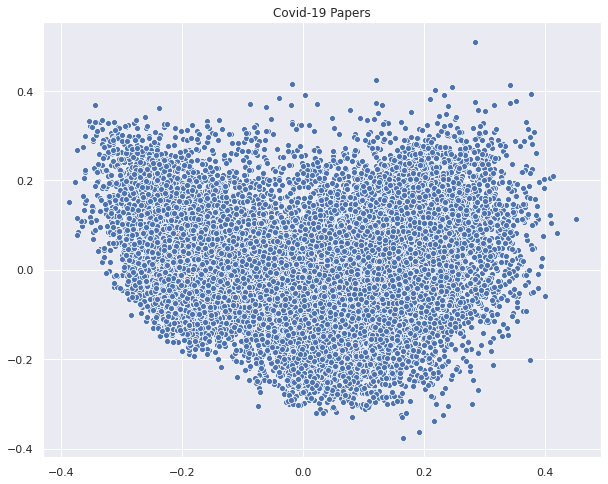

In [0]:
sns.set(rc={'figure.figsize': (10,8)})
sns.scatterplot(X_pca[:,0], X_pca[:, 1])
plt.title('Covid-19 Papers');

## Definição do número de clusters

- Fast K-means: https://www.researchgate.net/publication/51929167_Fast_K-Means_Algorithm_Clustering

In [0]:
from sklearn.cluster import MiniBatchKMeans

Text(0, 0.5, 'WCSS')

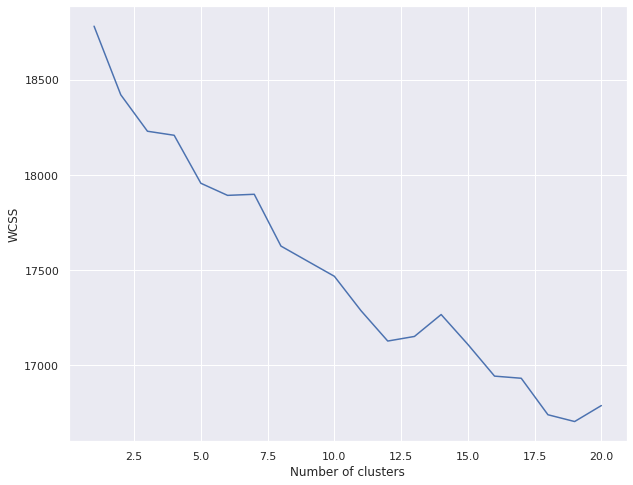

In [0]:
wcss = []
for i in range(1, 21):
  kmeans = MiniBatchKMeans(n_clusters = i, random_state = 0)
  kmeans.fit(vectorized)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Agrupamento com k-means

In [0]:
k = 5
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(vectorized)

In [0]:
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int32)

In [0]:
len(y_pred)

20209

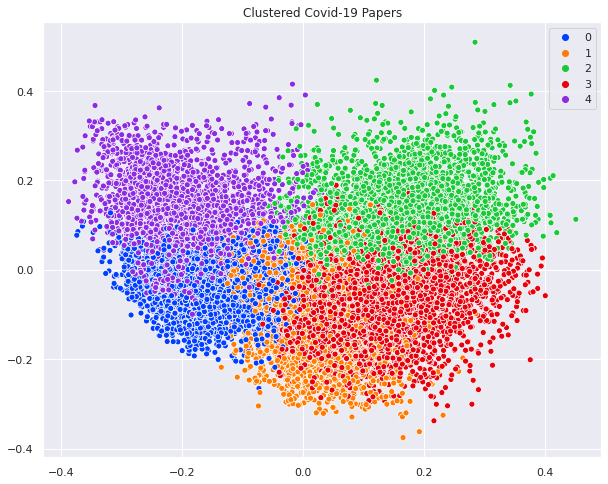

In [0]:
palette = sns.color_palette('bright', len(set(y_pred)))
sns.scatterplot(X_pca[:,0], X_pca[:, 1], hue=y_pred, legend='full', palette=palette)
plt.title('Clustered Covid-19 Papers');

## Visualização dos resultados

In [0]:
# Based on: https://www.kaggle.com/maksimeren/covid-19-literature-clustering

from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, CustomJS
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap
from bokeh.io import output_file, show
from bokeh.transform import transform
from bokeh.io import output_notebook
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import RadioButtonGroup
from bokeh.models import TextInput
from bokeh.layouts import gridplot
from bokeh.models import Div
from bokeh.models import Paragraph
from bokeh.layouts import column, widgetbox

output_notebook()
y_labels = y_pred

# data sources
source = ColumnDataSource(data=dict(
    x= X_pca[:,0], 
    y= X_pca[:,1],
    x_backup = X_pca[:,0],
    y_backup = X_pca[:,1],
    desc= y_labels, 
    titles= corona_df_completo['title'],
    abstract = corona_df_completo['abstract'],
    labels = ["C-" + str(x) for x in y_labels]
    ))

# hover over information
hover = HoverTool(tooltips=[
    ("Title", "@titles{safe}"),
    ("Abstract", "@abstract{safe}"),
],
                 point_policy="follow_mouse")

# map colors
mapper = linear_cmap(field_name='desc', 
                     palette=Category20[20],
                     low=min(y_labels) ,high=max(y_labels))

# prepare the figure
p = figure(plot_width=800, plot_height=800, 
           tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'], 
           title="Covid-19 Papers", 
           toolbar_location="right")

# plot
p.scatter('x', 'y', size=5, 
          source=source,
          fill_color=mapper,
          line_alpha=0.3,
          line_color="black",
          legend = 'labels')

# add callback to control 
callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var radio_value = cb_obj.active;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            labels = data['desc'];
            
            if (radio_value == '20') {
                for (i = 0; i < x.length; i++) {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                }
            }
            else {
                for (i = 0; i < x.length; i++) {
                    if(labels[i] == radio_value) {
                        x[i] = x_backup[i];
                        y[i] = y_backup[i];
                    } else {
                        x[i] = undefined;
                        y[i] = undefined;
                    }
                }
            }


        source.change.emit();
        """)

# callback for searchbar
keyword_callback = CustomJS(args=dict(p=p, source=source), code="""
            
            var text_value = cb_obj.value;
            var data = source.data; 
            
            x = data['x'];
            y = data['y'];
            
            x_backup = data['x_backup'];
            y_backup = data['y_backup'];
            
            abstract = data['abstract'];
            titles = data['titles'];
            
            for (i = 0; i < x.length; i++) {
                if(abstract[i].includes(text_value) || 
                   titles[i].includes(text_value)  {
                    x[i] = x_backup[i];
                    y[i] = y_backup[i];
                } else {
                    x[i] = undefined;
                    y[i] = undefined;
                }
            }
        source.change.emit();
        """)

# option
option = RadioButtonGroup(labels=["C-0", "C-1", "C-2",
                                  "C-3", "C-4", "C-5",
                                  "C-6", "C-7", "C-8",
                                  "C-9", "C-10", "C-11",
                                  "C-12", "C-13", "C-14",
                                  "C-15", "C-16", "C-17",
                                  "C-18", "C-19", "All"], 
                          active=20, callback=callback)

# search box
keyword = TextInput(title="Search:", callback=keyword_callback)

#header
header = Div(text="""<h1>Covid-19 Papers</h1>""")

# show
show(column(header, widgetbox(option, keyword),p))

# Sumarização dos textos

## Testes com a função

In [0]:
corona_df_original = pd.read_csv('/content/gdrive/My Drive/corona_df_original.csv')

In [0]:
corona_df_original.shape

(500, 5)

In [0]:
corona_df_original.head()

Unnamed: 0  ...                                                                                                 text
0        7490  ...  Introduction Acute myocardial depression in septic shock is common [1] . Myocardial depression i...
1        9082  ...  Proteases are expressed ubiquitously in all tissues of the human body. By definition, the word B...
2        1015  ...  Mycobacterium tuberculosis infection has long been a public health problem in Taiwan. The annual...
3        7781  ...  Magnolol and honokiol inhibited the amyloid formation of human calcitonin. Thioflavin-T (ThT) fl...
4         727  ...  Emerging infectious diseases are often the result of a host shift, where a pathogen jumps from o...

[5 rows x 5 columns]

In [0]:
!pip install bert-extractive-summarizer

     |████████████████████████████████| 573kB 3.8MB/s 
     |████████████████████████████████| 3.7MB 20.8MB/s 
     |████████████████████████████████| 1.0MB 40.4MB/s 
     |████████████████████████████████| 870kB 47.2MB/s 
  Created wheel for bert-extractive-summarizer: filename=bert_extractive_summarizer-0.4.1-cp36-none-any.whl size=13661 sha256=84cdca20c05bde76468dcd0aa25c09180449708de2cfbede8a93701569777d8e
  Stored in directory: /root/.cache/pip/wheels/3f/68/cb/20db204d391e6976e8813f524b7441336e98833b123f9277dd
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=1b0f6c60f50e2da036123726b6f25f78711b13fb911d1d9b553f24dca8fa986e
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built bert-extractive-summarizer sacremoses


In [0]:
from summarizer import Summarizer

In [0]:
text = str(corona_df_original['text'][0])
print(text)

Introduction Acute myocardial depression in septic shock is common [1] . Myocardial depression is mediated by circulating depressant substances, which until now have been incompletely characterized [2] .
 The aim of our study was to observe the eff ects of TNFα on the model of perfused rat heart. Methods After profound anesthesia with pentothal, the Wistar rats were killed by exsanguination. After sternotomy, the heart was taken and connected to the Langendorf column. The apex of the heart was hooked to a strength sensor. Biopac student laboratory software was used to record and analyse heart contractions. Contractions were recorded every 5 minutes during periods of 20 minutes. Control measurements were fi rst recorded. We measured four parameters: heart rate, contraction force, speeds of contraction and relaxation for control, during TNFα (20 ng/ml) exposure and after removal of TNFα. We express the variations of parameters as percentage of the control ± SEM. A paired t test was used 

In [0]:
len(text)

530585

In [0]:
model = Summarizer()

In [0]:
result = model(text)

In [0]:
result

"Introduction Acute myocardial depression in septic shock is common [1] . After sternotomy, the heart was taken and connected to the Langendorf column. The apex of the heart was hooked to a strength sensor. Biopac student laboratory software was used to record and analyse heart contractions. Contractions were recorded every 5 minutes during periods of 20 minutes. We could not identify any specifi c trend between sepsis severity and erythrocyte elasticity. Reference\n Introduction Whole blood experiments suggest that cardiopulmonary bypass (CPB) causes red blood cell (RBC) trauma and changes in deformability that may contribute to postoperative microcirculatory Introduction Neutrophil gelatinase-associated lipocalin (NGAL)/ lipocalin2, known as a sensitive biomarker of acute kidney injury, prevents bacterial iron uptake, resulting in the inhibition of its overgrowth [1] . Conclusion Bacterial stimulation of TLR4 and TLR9 pathways plays a pivotal role in the expression of NGAL mRNA in gu

In [0]:
result = ''.join(result)
print(result)

Introduction Acute myocardial depression in septic shock is common [1] . After sternotomy, the heart was taken and connected to the Langendorf column. The apex of the heart was hooked to a strength sensor. Biopac student laboratory software was used to record and analyse heart contractions. Contractions were recorded every 5 minutes during periods of 20 minutes. We could not identify any specifi c trend between sepsis severity and erythrocyte elasticity. Reference
 Introduction Whole blood experiments suggest that cardiopulmonary bypass (CPB) causes red blood cell (RBC) trauma and changes in deformability that may contribute to postoperative microcirculatory Introduction Neutrophil gelatinase-associated lipocalin (NGAL)/ lipocalin2, known as a sensitive biomarker of acute kidney injury, prevents bacterial iron uptake, resulting in the inhibition of its overgrowth [1] . Conclusion Bacterial stimulation of TLR4 and TLR9 pathways plays a pivotal role in the expression of NGAL mRNA in gut,

In [0]:
len(result)

85477